In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from scipy.stats import randint
import pickle
import cv2
import numpy as np
import csv

In [71]:
# Load the dataset
data = pd.read_csv("leaf_features.csv")

In [72]:
data = data.drop(columns=['Image Name'])

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[["Leaf Count", "Leaf Area Covered"]], data["Weight"], test_size=0.1, random_state=42)

In [74]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32), (128, 64)],
    'activation': ['relu', 'logistic'],
    'max_iter': [500, 1000, 1500],
}

In [75]:
# Create the MLPRegressor model
model = MLPRegressor(random_state=42)

In [76]:
# # Create and train the MLPRegressor model
# model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [77]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=8, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=MLPRegressor(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(64,), (128,), (64, 32),
                                                (128, 64)],
                         'max_iter': [500, 1000, 1500]},
             scoring='neg_mean_squared_error')

In [78]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

In [79]:
# Make predictions using the best model
y_pred = best_model.predict(X_test)

In [80]:
# model.fit(X_train, y_train)

In [81]:
# # Save the trained model to a file
# filename = 'mlp_model_new.pkl'
# pickle.dump(model, open(filename, 'wb'))

In [82]:
# Make predictions
# y_pred = model.predict(X_test)

In [83]:
# Compute R^2 score and mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [84]:
# Print the best hyperparameters, R^2 score, and mean squared error
print("Best Hyperparameters:", grid_search.best_params_)
print(f"R^2 Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")

Best Hyperparameters: {'activation': 'logistic', 'hidden_layer_sizes': (64, 32), 'max_iter': 500}
R^2 Score: -0.104
Mean Squared Error: 0.002
Mean Absolute Error: 0.036


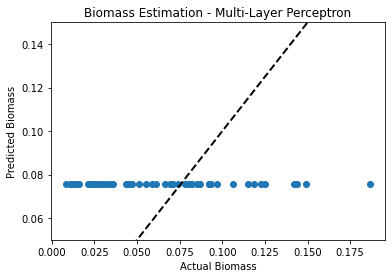

In [85]:
# Plot the actual biomass values and predicted biomass values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Biomass')
plt.ylabel('Predicted Biomass')
plt.title('Biomass Estimation - Multi-Layer Perceptron')
plt.ylim(0.05, 0.15)
plt.show()